### Uditya Patel

### Task#3 Decision Trees Algorithm

**for  the given 'Iris dataset, creating the Decision Tree Classifier and visualizing it graphically.**

In [27]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
X=pd.DataFrame(iris.data, columns=iris.feature_names)

In [28]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Using pandas get_dummies method to change the catagorical target values into binary

In [30]:
y = pd.get_dummies(y)
y.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### 0 refers to Iris-setosa
### 1 refers to Iris-versicolor
### 2 refers to Iris-virginica

### we will now train and test the dataset to evaluate the performace of the model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [34]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### visualizing the Decision Tree to understand it better.



In [35]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


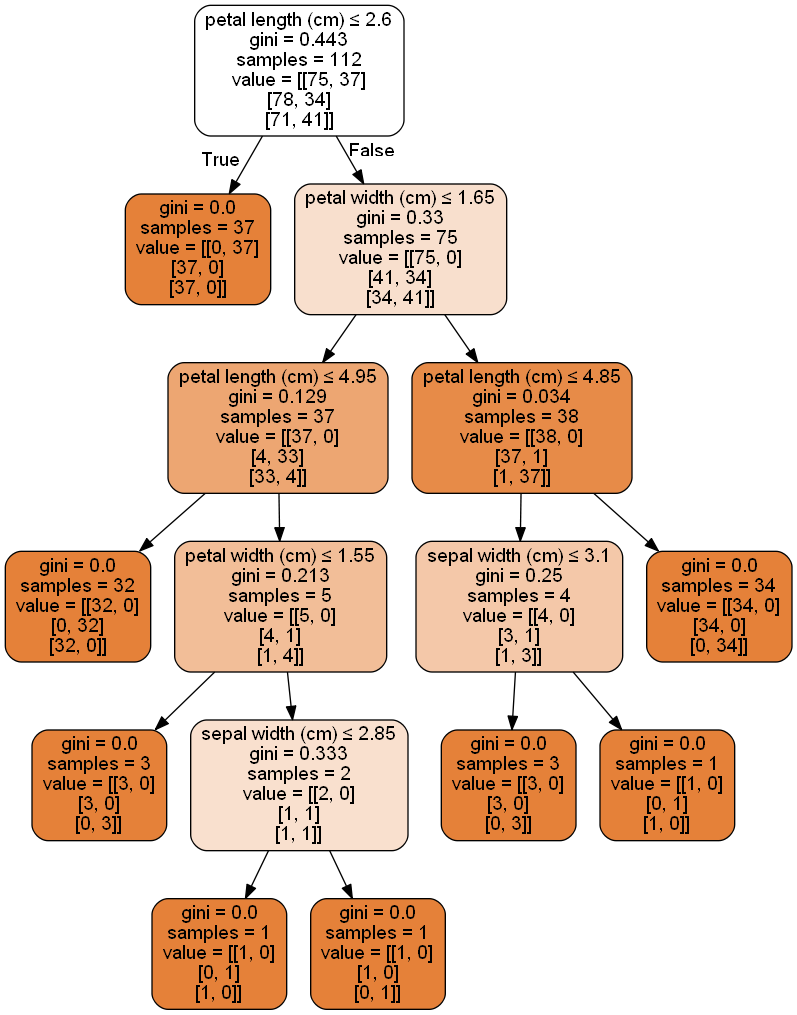

In [36]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Now feeding new/test data to this classifer it would be able to predict the right class accordingly.**

In [37]:
y_pred = dtc.predict(X_test)
print(y_pred[0:5])

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]


### Creating a Confusion Matrix to visualize the accuracy of the model

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
species_tested = np.array(y_test).argmax(axis = 1)
species_predicted = np.array(y_pred).argmax(axis = 1)
confusion_matrix(species_tested, species_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### Calculating the Accuracy scores to check the performace of the model

In [40]:
print("Train Score:", accuracy_score(dtc.predict(X_train), y_train)*100)
print("Test Score:", accuracy_score(y_test, y_pred)*100)

Train Score: 100.0
Test Score: 97.36842105263158
